In [30]:
# IMPORTS

import numpy as np
import matplotlib.pyplot as plt

In [31]:
# FUNCTIONS

# source: https://medium.com/@abhash-rai/poisson-process-simulation-and-analysis-in-python-e62f69d1fdd0

def generate_poisson_events(rate, time_duration):
    num_events = np.random.poisson(rate * time_duration)
    event_times = np.sort(np.random.uniform(0, time_duration, num_events))
    inter_arrival_times = np.diff(event_times)
    return num_events, event_times, inter_arrival_times

def plot_non_sequential_poisson(num_events, event_times, inter_arrival_times, rate, time_duration):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Poisson Process Simulation (λ = {rate}, Duration = {time_duration} seconds)\n', fontsize=16)

    axs[0].step(event_times, np.arange(1, num_events + 1), where='post', color='blue')
    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Event Number')
    axs[0].set_title(f'Poisson Process Event Times\nTotal: {num_events} events\n')
    axs[0].grid(True)

    axs[1].hist(inter_arrival_times, bins=20, color='green', alpha=0.5)
    axs[1].set_xlabel('Inter-Arrival Time')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Histogram of Inter-Arrival Times\nMEAN: {np.mean(inter_arrival_times):.2f} | STD: {np.std(inter_arrival_times):.2f}\n')
    axs[1].grid(True, alpha=0.5)
    
    plt.tight_layout()
    plt.show()

def plot_sequential_poisson(num_events_list, event_times_list, inter_arrival_times_list, rate, time_duration):
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle(f'Poisson Process Simulation (Duration = {time_duration} seconds)\n', fontsize=16)

    axs[0].set_xlabel('Time')
    axs[0].set_ylabel('Event Number')
    axs[0].set_title(f'Poisson Process Event Times')
    axs[0].grid(True)

    axs[1].set_xlabel('Inter-Arrival Time')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title(f'Histogram of Inter-Arrival Times')
    axs[1].grid(True, alpha=0.5)

    color_palette = plt.get_cmap('tab20')
    colors = [color_palette(i) for i in range(len(rate))]

    for n, individual_rate in enumerate(rate):
        num_events = num_events_list[n]
        event_times = event_times_list[n]
        inter_arrival_times = inter_arrival_times_list[n]

        axs[0].step(event_times, np.arange(1, num_events + 1), where='post', color=colors[n], label=f'λ = {individual_rate}, Total Events: {num_events}')
        axs[1].hist(inter_arrival_times, bins=20, color=colors[n], alpha=0.5, label=f'λ = {individual_rate}, MEAN: {np.mean(inter_arrival_times):.2f}, STD: {np.std(inter_arrival_times):.2f}')

    axs[0].legend()
    axs[1].legend()

    plt.tight_layout()
    plt.show()

def poisson_simulation(rate, time_duration, show_visualization=True):
    if isinstance(rate, int) or isinstance(rate, float):
        num_events, event_times, inter_arrival_times = generate_poisson_events(rate, time_duration)
        
        if show_visualization:
            plot_non_sequential_poisson(num_events, event_times, inter_arrival_times, rate, time_duration)
        else:
            return num_events, event_times, inter_arrival_times

    elif isinstance(rate, list):
        num_events_list = []
        event_times_list = []
        inter_arrival_times_list = []

        for individual_rate in rate:
            num_events, event_times, inter_arrival_times = generate_poisson_events(individual_rate, time_duration)
            num_events_list.append(num_events)
            event_times_list.append(event_times)
            inter_arrival_times_list.append(inter_arrival_times)

        if show_visualization:
            plot_sequential_poisson(num_events_list, event_times_list, inter_arrival_times_list, rate, time_duration)
        else:
            return num_events_list, event_times_list, inter_arrival_times_list

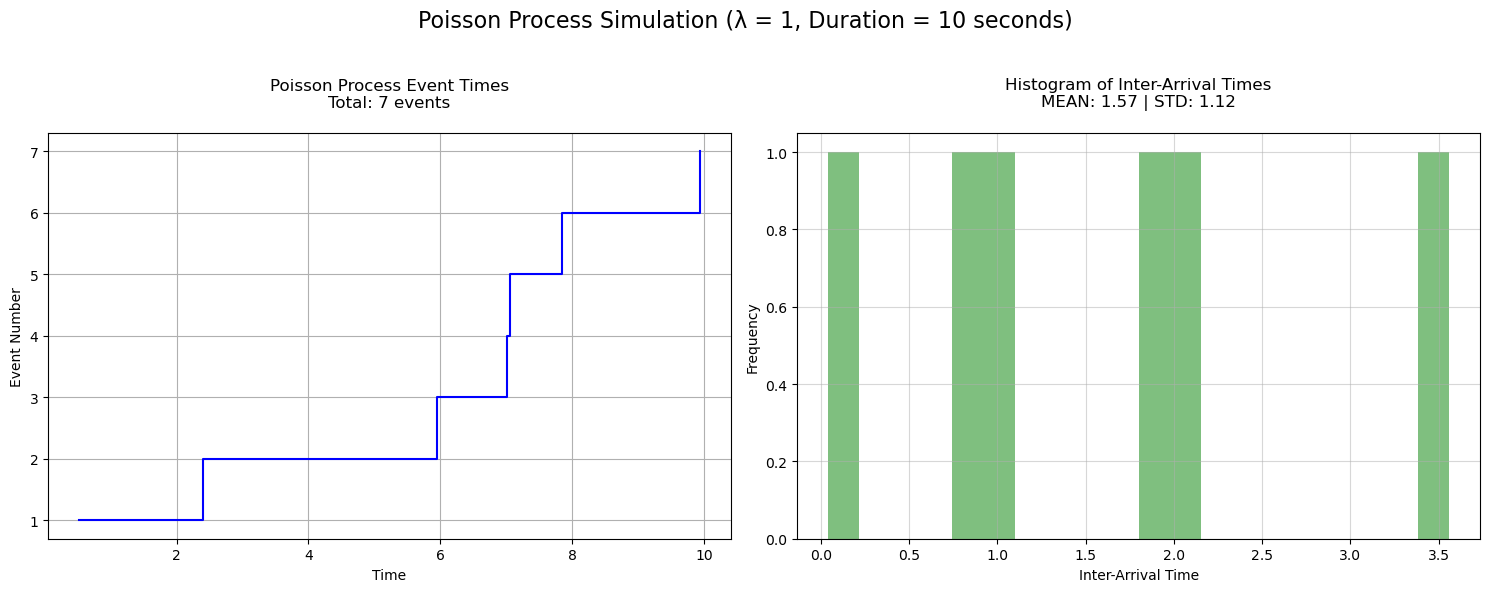

In [32]:
# EXPERIMENT

poisson_simulation(rate=1, time_duration=10)